Grid Searches
=================

Grid-Search with build-in cross validation

In [1]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [2]:
#from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
#digits = load_digits()
#X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [3]:
import pandas as pd
# load data and split
df = pd.read_csv("/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_full_1.csv")
cols_we_like = [col for col in df.columns if col not in [['id','location','num']]]
# train test split
X = df[cols_we_like]
y = df.num
X_train, X_test, y_train, y_test = train_test_split(X, y)

Define parameter grid:

In [4]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}
              

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])}


In [5]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

A GridSearchCV object behaves just like a normal classifier.

In [6]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.522727 -   0.0s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.534884 -   0.0s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.547619 -   0.0s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.547619 -   0.0s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.550000 -   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.522727 -   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:    0.2s



[CV] C=0.01, gamma=1e-05 .............................................
[CV] .................... C=0.01, gamma=1e-05, score=0.550000 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................... C=0.01, gamma=0.0001, score=0.522727 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................... C=0.01, gamma=0.0001, score=0.534884 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................... C=0.01, gamma=0.0001, score=0.547619 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................... C=0.01, gamma=0.0001, score=0.547619 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................... C=0.01, gamma=0.0001, score=0.550000 -   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................... C=0.01, gamma=0.001, score=0.522727 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [7]:
grid_search.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0])

In [8]:
grid_search.score(X_test, y_test)

0.60563380281690138

In [9]:
grid_search.best_params_

{'C': 10.0, 'gamma': 1.0000000000000001e-05}

<bound method GridSearchCV.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)>

<IPython.core.display.Javascript object>


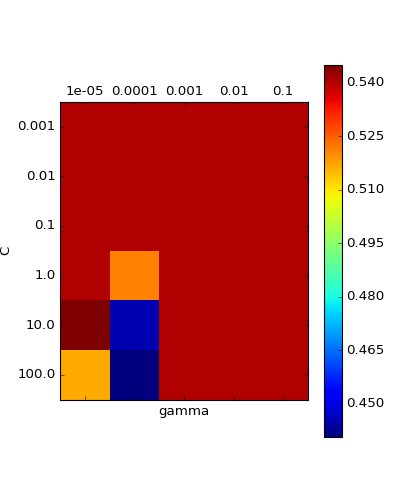

In [10]:
# We extract just the scores
%matplotlib notebook
import matplotlib.pyplot as plt

scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);